###Import e configuração de recursos

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

sns.set()
plt.ion()
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (15,9)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [351]:
hpn = pd.read_csv('https://raw.githubusercontent.com/BernnardoSBO/ICD-TrabalhoFinal/master/databases/world-happiness-clean.csv')
hpn.head(1)

,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção,Ano
0,Afghanistan,4.758,7.647,0.539,51.6,0.6,0.121,0.707,2010


#1 - Preparando dados para regressão

##Formatação dos dados

###Separação da base em parâmetros da regressão e resultado

Primeiramente iremos preparar os dados para realizar uma regressão. Assim, como nosso objetivo é a previsão da felicidade de um país e queremos chegar nisso através do PIB per capita, iremos separar a nossa base de dados em parâmetro (PIB per capita) e resultado (Índice de felicidade)

In [352]:
y = hpn['Nota para Escada de Cantril'].values.reshape(-1,1)
X = hpn['Log do PIB per capita'].values.reshape(-1,1)




###Separação em conjunto de dados de treino e conjunto de dados de teste

<p>Depois disso, vamos separar o nosso conjunto de dados em conjunto de dados de teste e conjunto de dados de validação.</p>
<p>O conjunto de dados de teste servirá para treinarmos o algoritmo de regressão.</p>
<p>Já o conjunto de dados de validação servirá para, ao final do treinamento, validarmos se a nossa regressão foi boa ou não</p>
<p>Para fazermos isso, iremos utilizar o método <i>'train_test_split()'</i> da biblioteca de seleção de modelo do scikit-learn, uma vez que ela já faz o particionamento do nosso conjunto de dados com o tamanho desejado para o conjunto de testes. No nosso caso, vamos reservar 20% dos valores para formar nosso grupo de dados de teste.

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [354]:
print(X_train.shape,'\n',X_test.shape, sep='')

(897, 1)
(225, 1)


###Regressão Linear

In [355]:

  #defino meu modelo LinReg
model = LinearRegression()
  #treino o meu modelo usando os valores dos parametros para chegar nos valores esperados
reg = model.fit(X_train, y_train)
  #testo meu treino com o meu conjunto de validação do kfold

y_pred = reg.predict(X_test)


print(f'Coefficient: {reg.coef_[0][0]:.2f}')
print(f'Intercept: {reg.intercept_[0]:.2f}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R2: {r2_score(y_test, y_pred):.2f}')

Coefficient: 0.78
Intercept: -1.84
Mean squared error: 0.52
R2: 0.59


Text(0.5, 1.0, 'Regressão Linear, Log do PIB per capita X Índice de Felicidade')

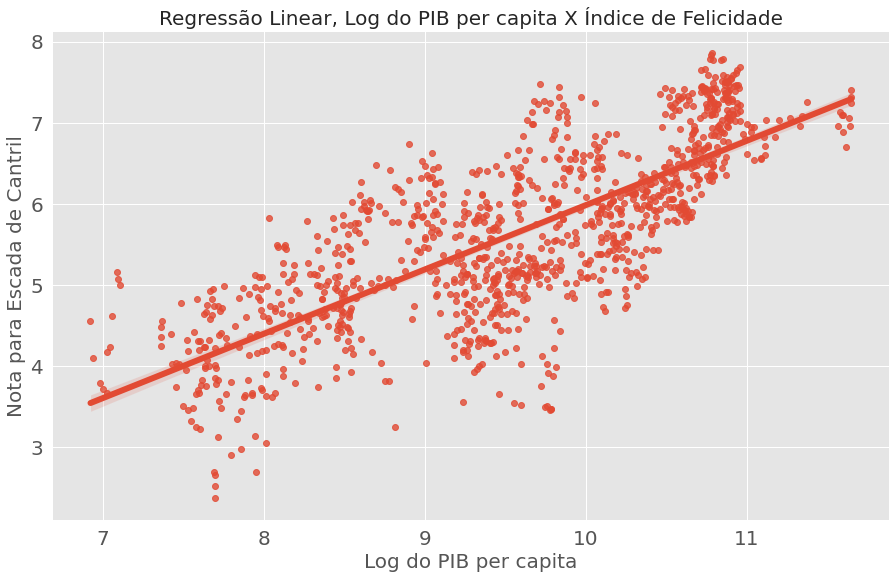

In [356]:
sns.regplot(x='Log do PIB per capita', y='Nota para Escada de Cantril', data=hpn)
plt.title('Regressão Linear, Log do PIB per capita X Índice de Felicidade')
